## DSCI 100 007 Group 37

- #####  Final Report

In [3]:
install.packages("psych")

also installing the dependency ‘mnormt’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(tidyverse)
library(psych)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ psych::%+%()      masks ggplot2::%+%()
✖ scales::alpha()   masks psych::alpha(), ggplot

##### Step 1 : read data from url

In [5]:
path <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_data <-read_csv(path)
heart_disease_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


##### Step 2 : Naming and filtering data

In [6]:
# Give each column a specific name from given dataset
heart_disease_data <- read_csv(path, col_names = FALSE) |> 
  set_names(c("age", "sex", "cp", "trestbpd", "chol", "fbs", "restecg", "thalach",
              "exang", "oldpeak", "slope", "ca", "thal", "num"))
heart_disease_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbpd,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


##### Table 1: Raw Heart Disease Data

##### Step 3 : Wrangling and cleaning data by selecting only chosen predictors and modify num (target) to 0 & 1 only

In [7]:
filtered_heart_disease_data1 <- heart_disease_data |>
  select(1, 2, 4, 5, 8, 14)

changed_num2 <- filtered_heart_disease_data1 |>
  mutate(num = ifelse(num >= 1, 1, 0))
# remove all row with '?'
changed_num_3 <- changed_num2 |>
  filter_all(all_vars(. != "?"))

final_data1 <- changed_num_3
final_data1 <- final_data1 |>
    mutate(num = as_factor(num))
final_data1

age,sex,trestbpd,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,145,233,150,0
67,1,160,286,108,1
67,1,120,229,129,1
⋮,⋮,⋮,⋮,⋮,⋮
57,1,130,131,115,1
57,0,130,236,174,1
38,1,138,175,173,0


##### Table 2: Heart Disease Data for Analysis

##### Step 4 : Split Data into training and testing data

In [8]:
set.seed(9999)

heart_disease_split1 <- initial_split(final_data1, prop = 0.75, strata = num)

In [20]:
heart_disease_train1 <- training(heart_disease_split1)
heart_disease_train1

age,sex,trestbpd,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,145,233,150,0
37,1,130,250,187,0
41,0,130,204,172,0
⋮,⋮,⋮,⋮,⋮,⋮
57,0,140,241,123,1
45,1,110,264,132,1
57,1,130,131,115,1


##### Table 3: Heart Disease Training Data

In [22]:
heart_disease_test1 <- testing(heart_disease_split1)
heart_disease_test1

age,sex,trestbpd,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,1,160,286,108,1
57,0,120,354,163,0
63,1,130,254,147,1
⋮,⋮,⋮,⋮,⋮,⋮
68,1,144,193,141,1
57,0,130,236,174,1
38,1,138,175,173,0


##### Table 4: Heart Disease Testing Data

##### Step 5: Make summary for Exploratory Data

In [10]:
describe(heart_disease_train1)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,227,54.4933921,8.7164629,55,54.601093,8.8956,34,77,43,-0.1300668,-0.4441941,0.57853196
sex,2,227,0.6651982,0.4729640,1,0.704918,0.0000,0,1,1,-0.6954884,-1.5229468,0.03139173
trestbpd,3,227,131.7973568,18.1557517,130,130.546448,14.8260,94,200,106,0.7272229,0.9437541,1.20503957
chol,4,227,246.5638767,53.8300268,240,244.049180,50.4084,126,564,438,1.1738845,4.7696730,3.57282437
thalach,5,227,148.8678414,22.8765478,152,150.071038,23.7216,88,195,107,-0.4567269,-0.4767998,1.51836981
num*,6,227,1.4581498,0.4993466,1,1.448087,0.0000,1,2,1,0.1668815,-1.9808185,0.03314280


##### Table 5: Summary of Training Data

##### Step 5: Visualization of data set for exploratory data

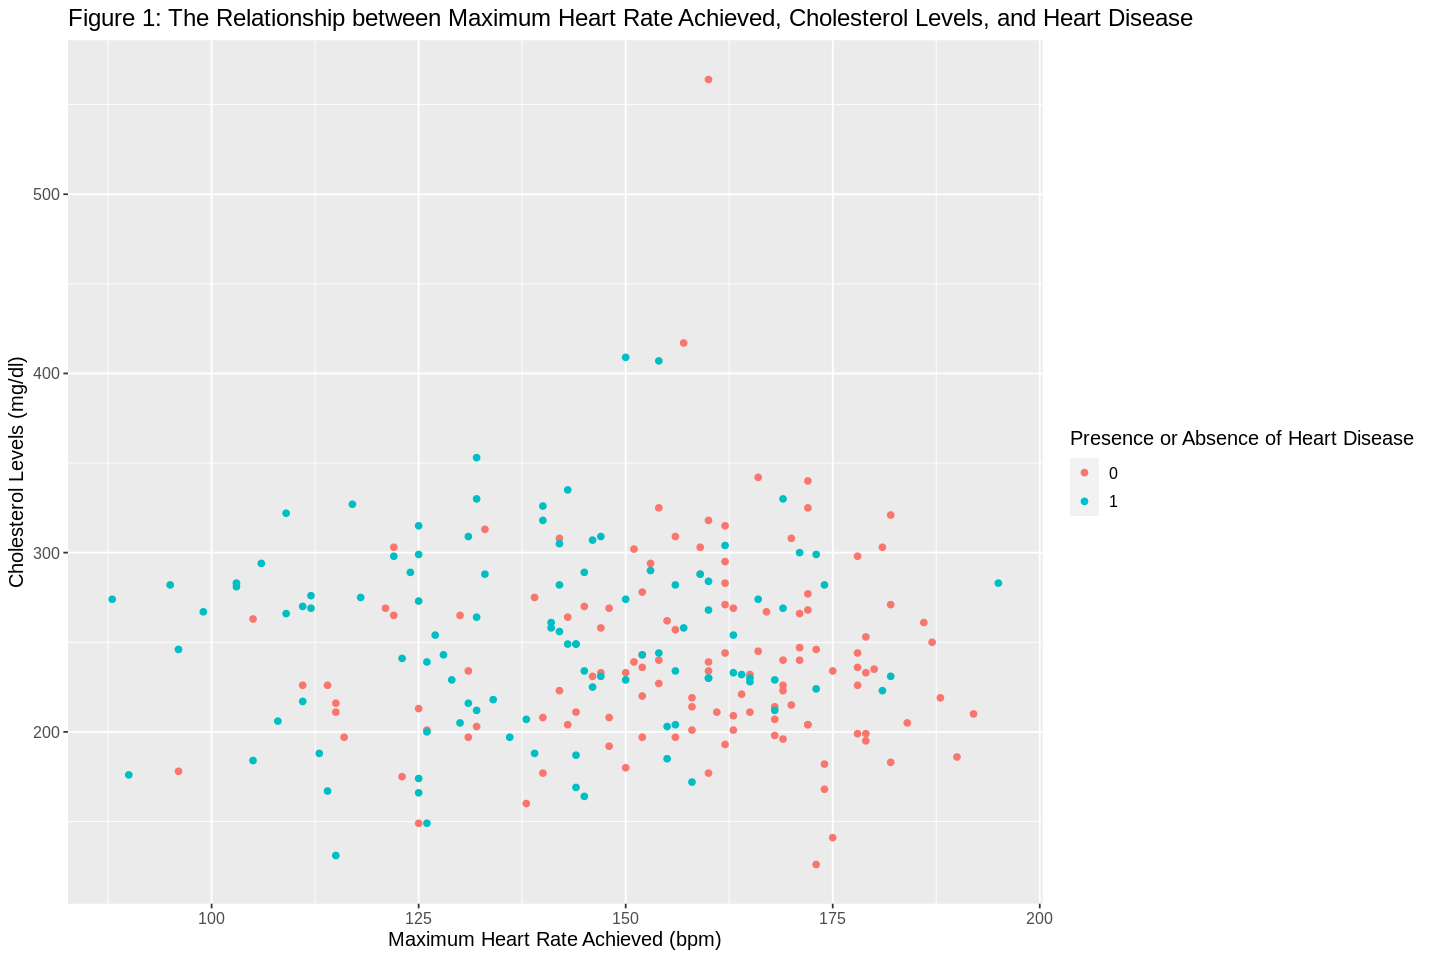

In [39]:
options(repr.plot.width = 12, repr.plot.height = 8)
heart_disease_plot <- heart_disease_train1 |>
    ggplot(aes(x = thalach, y = chol, color = num))+
    geom_point() +
    labs(x = "Maximum Heart Rate Achieved (bpm)", y = "Cholesterol Levels (mg/dl)", colour = "Presence or Absence of Heart Disease")+
    #0 is absence, 1 is presence
    ggtitle("Figure 1: The Relationship between Maximum Heart Rate Achieved, Cholesterol Levels, and Heart Disease") +
    theme(text = element_text(size = 12))
heart_disease_plot

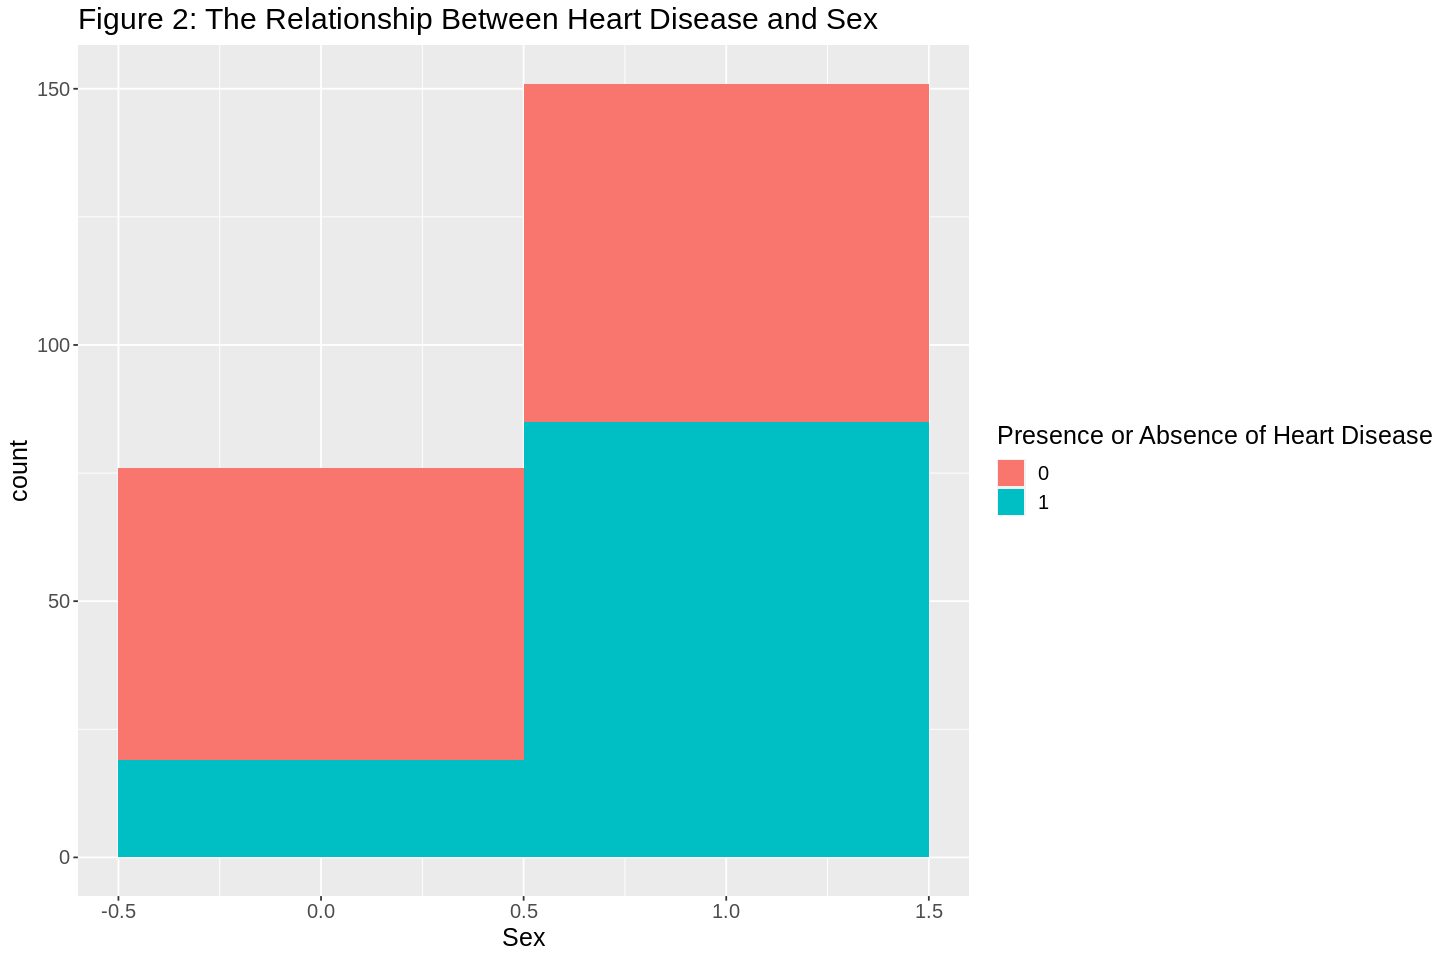

In [35]:
options(repr.plot.width = 12, repr.plot.height = 8)
heart_disease_plot1 <- heart_disease_train1 |>
    ggplot(aes(x = sex, fill = num))+
    geom_histogram(binwidth = 1) +
    labs(x = "Sex", fill = "Presence or Absence of Heart Disease")+
    #0 is absence, 1 is presence
    ggtitle("Figure 2: The Relationship Between Heart Disease and Sex")+
    #0 is female, 1 is male
    theme(text = element_text(size = 15))
heart_disease_plot1

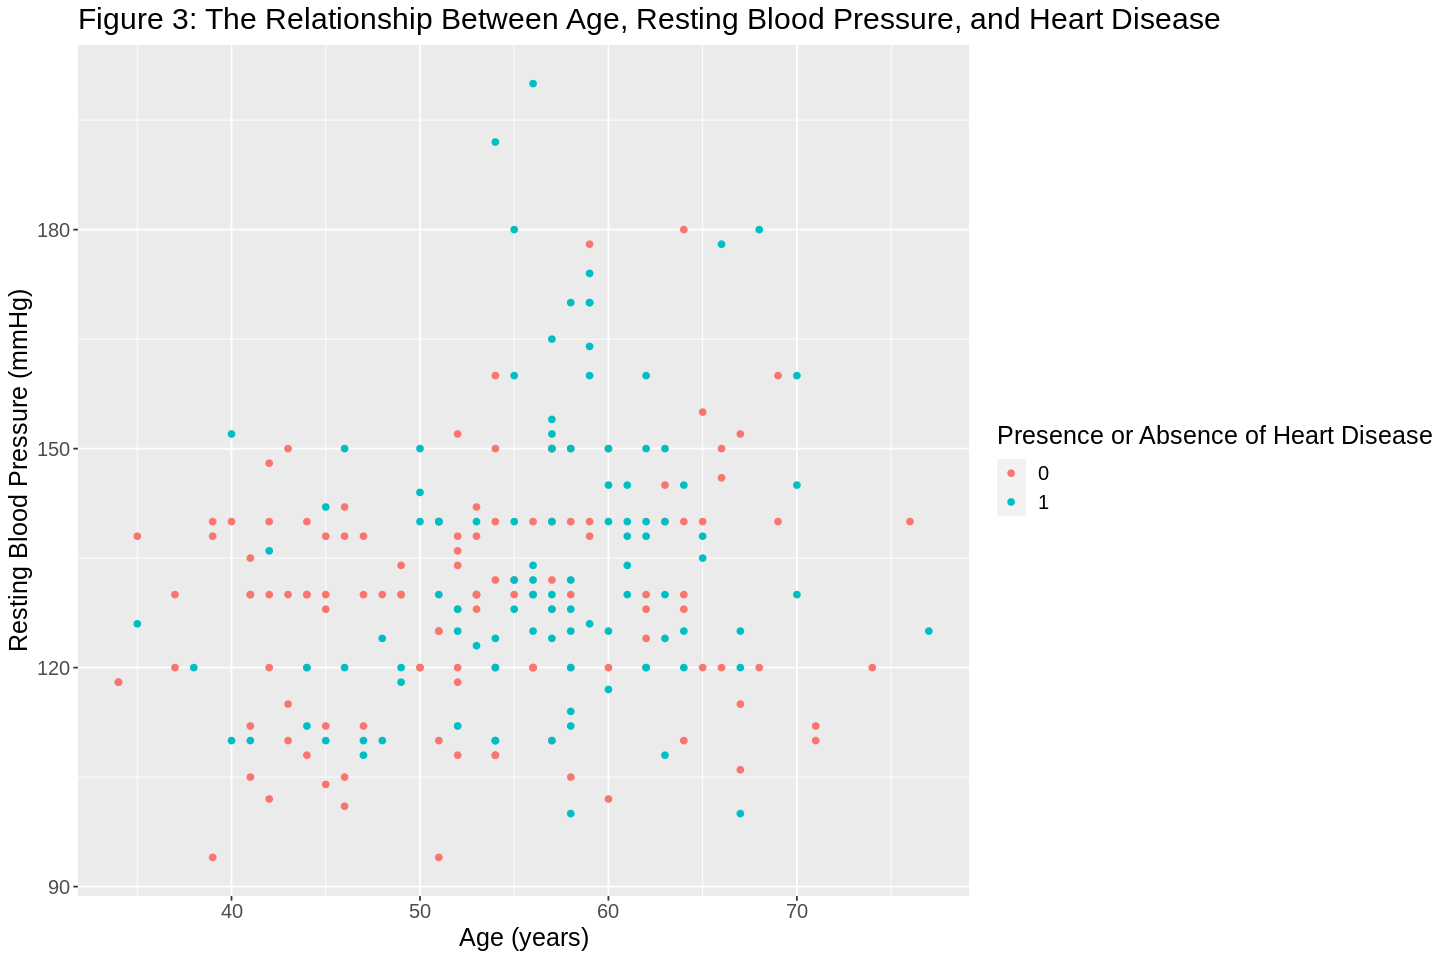

In [37]:
options(repr.plot.width = 12, repr.plot.height = 8)
heart_disease_plot2 <- heart_disease_train1 |>
    ggplot(aes(x = age, y = trestbpd, color = num))+
    geom_point() +
    labs(x = "Age (years)", y = "Resting Blood Pressure (mmHg)", colour = "Presence or Absence of Heart Disease")+
    #0 is absence, 1 is presence
    ggtitle("Figure 3: The Relationship Between Age, Resting Blood Pressure, and Heart Disease")+
    theme(text = element_text(size = 15))
heart_disease_plot2

##### Step 6: Create a model specification with neighbours = tune(),  recipe, and split up training data for cross-validation 

In [40]:
#create model, recipe, and tune workflow to perform 5 fold cross-validation to select the best k in the range 1-10
#collect_metrics() used return a table that tells the classifier's mean and standard error

set.seed(9999)

heart_disease_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
    set_engine("kknn")|>
    set_mode("classification")
heart_disease_tune

heart_disease_recipe <- recipe(num ~ trestbpd + chol + age + sex + thalach, data = heart_disease_train1)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())
heart_disease_recipe

heart_disease_vfold <- vfold_cv(heart_disease_train1, v = 5, strata = num)
    

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

##### Step 7: Create a Workflow and estimate classifier accuracy for K nearest neighbour ranging from 1 to 100

In [41]:
grid_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 2))

heart_disease_tune_workflow <- workflow()|>
    add_recipe(heart_disease_recipe)|>
    add_model(heart_disease_tune)|>
    tune_grid(resamples = heart_disease_vfold, grid = grid_vals)|>
    collect_metrics()
heart_disease_tune_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6432235,5,0.02512895,Preprocessor1_Model01
1,roc_auc,binary,0.6415238,5,0.02362951,Preprocessor1_Model01
3,accuracy,binary,0.6433202,5,0.01520974,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
97,roc_auc,binary,0.7899504,5,0.03348719,Preprocessor1_Model49
99,accuracy,binary,0.6875845,5,0.01760066,Preprocessor1_Model50
99,roc_auc,binary,0.7846746,5,0.03449404,Preprocessor1_Model50


##### Table 6: Collect Metrics

##### Step 8: Create a plot to determine the K with the highest accuracy

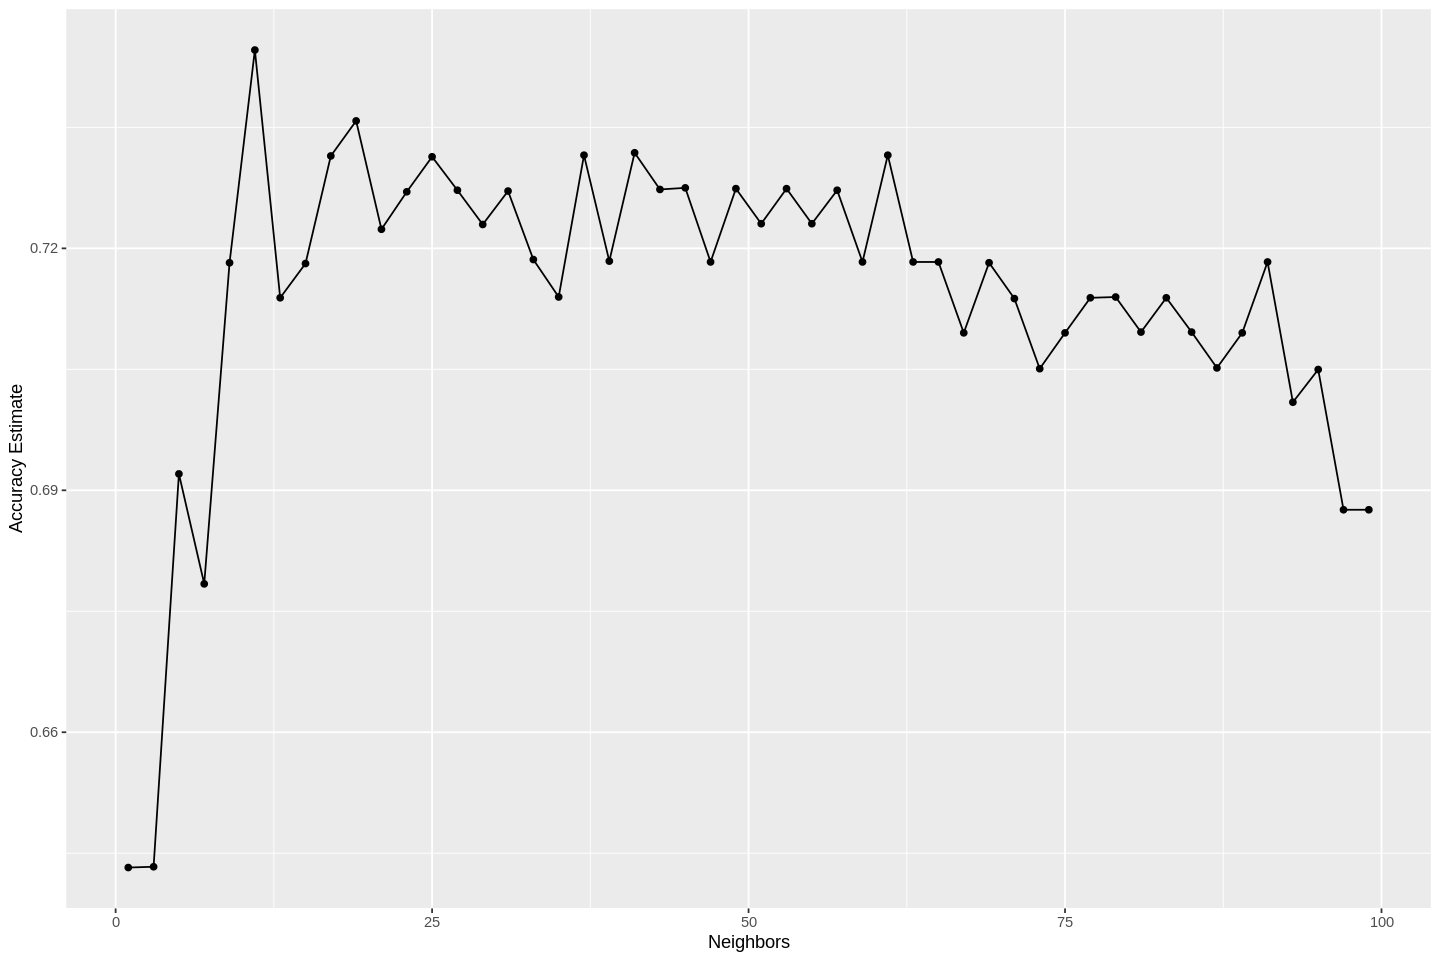

In [13]:
accuracies <- heart_disease_tune_workflow|>
    filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point()+
    geom_line()+
    labs(x = "Neighbors", y = "Accuracy Estimate")
accuracy_vs_k

##### Figure 4: Accuracy Estimate versus K Nearest Neighbour

##### Step 9: Create a new model specification for the best k and retrain classifier using fit

In [44]:
accuracies1 <- heart_disease_tune_workflow|>
    filter(.metric == "accuracy")|>
    select(neighbors, mean)|>
    arrange(desc(mean))|>
    head(1)|>
    pull(neighbors)

set.seed(9999)

heart_disease_model <- nearest_neighbor(weight_func = "rectangular", neighbors = accuracies1)|>
    set_engine("kknn")|>
    set_mode("classification")

heart_disease_best_fit <- workflow()|>
    add_recipe(heart_disease_recipe)|>
    add_model(heart_disease_model)|>
    fit(data = heart_disease_train1)
heart_disease_best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(11,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.30837
Best kernel: rectangular
Best k: 11

##### Step 10: Compute accuracy on testing data 

In [16]:
heart_disease_prediction <- heart_disease_best_fit |>
        predict(heart_disease_test1) |>
        bind_cols(heart_disease_test1)|>
        metrics(truth = num, estimate = .pred_class)
heart_disease_prediction

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7105263
kap,binary,0.4100212


##### Table 7: Accuracy of model

##### Step 11: Create confusion matrix of test data to show the table of predicted labels and correct labels. Use Recall and Precision mertrics to assess accuracy of model.

In [17]:
confusion_test<- heart_disease_best_fit |>
        predict(heart_disease_test1) |>
        bind_cols(heart_disease_test1)|>
    conf_mat(truth = num, estimate = .pred_class)
confusion_test 


          Truth
Prediction  0  1
         0 33 14
         1  8 21

In [45]:
recall <- 21/(21+14)
recall

precision <- 21/(21+8)
precision

[1] 0.6

[1] 0.7241379

##### Step 12: Create a Visualization of Analysis using confusion matrix

In [47]:
confusion_visual <- confusion_test |>
    ggplot(aes(x = Prediction, y = Truth, fill = Freq))+
    geom_tile()+
    scale_fill_gradient(low = "blue", high = "yellow")+
    labs(title = "Confusion Matrix", x = "Predicted", y = "Actual")
confusion_visual

ERROR: [1m[33mError[39m in [1m[1m`fortify()`:[22m
[33m![39m `data` must be a data frame, or other object coercible by `fortify()`, not an S3 object with class conf_mat.


##### Step 13: Proportions of Raw Data set

In [50]:
#Finding the proportion of how many have heart disease and how many does not have heart disease based on the original data set
#The proportion aims to show whether the raw data is overwhelmingly one category which would explain the low accuracy 

class_proportion <- final_data1|>
  group_by(num)|>
  summarize(class_proportion = n())

class_percentage <- class_proportion|>
    mutate(percentage_proportion = (class_proportion/303)*100)
class_percentage

num,class_proportion,percentage_proportion
<fct>,<int>,<dbl>
0,164,54.12541
1,139,45.87459
